# Detecting Letters in Sign Language (Classification)

by Levana Cohen & Rachel Mintz

## 1. Data Preparation
### 1.1 Packages import

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter

### 1.2 Data Loading<br>
The data for this project can be obtained from [this page](https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download) in kaggle.

In [2]:
train_letters = pd.read_csv("data/sign_mnist_train.csv")
test_letters = pd.read_csv("data/sign_mnist_test.csv")

In [3]:
train_letters.shape

(27455, 785)

In [4]:
test_letters.shape

(7172, 785)

Each line represents one image.<br>
The first column represents the letter (0-a, 1-b, ..., 25-z)<br>
The next columns represents the image as grayscale (28*28)

In [6]:
train_letters.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
train_letters.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
train_letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


##### Split to images and labels

In [9]:
train_label = train_letters["label"]
train_data = train_letters.iloc[:, 1:]

### 1.3 Showing the Images and Labels (MNIST)

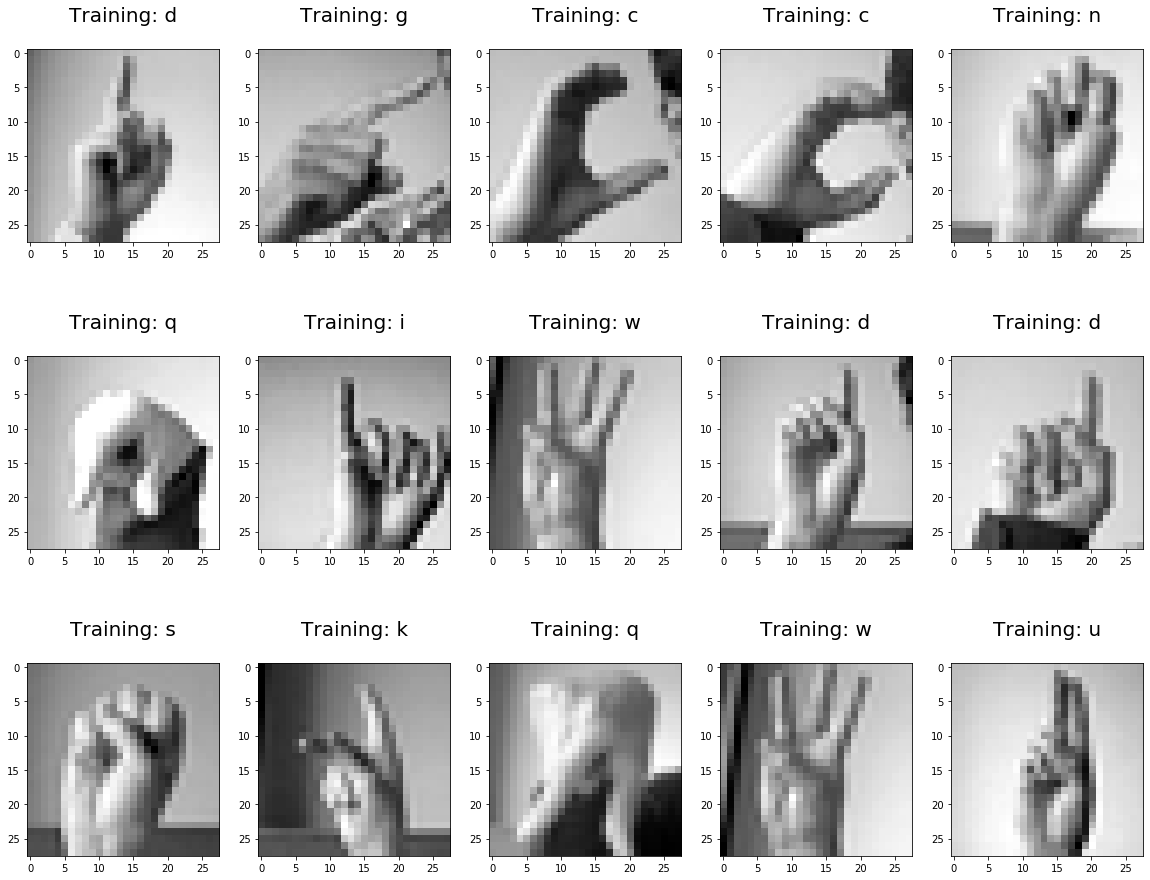

In [10]:
plt.figure(figsize=(20,16))
for index, (image, label) in enumerate(zip(np.array(train_data.iloc[:15, :]), train_label[0:15])):
    plt.subplot(3, 5, index + 1)
    image = image.reshape(28,28)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(chr(int(label)+97)), fontsize = 20)

### 1.3 Feature Preparation

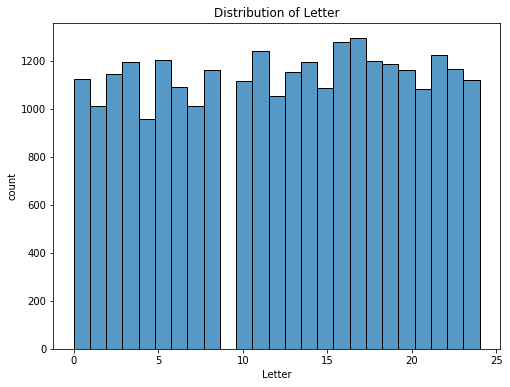

In [11]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=train_label,  bins=25)
plt.title('Distribution of Letter')
plt.ylabel('count')
plt.xlabel('Letter')
plt.show()

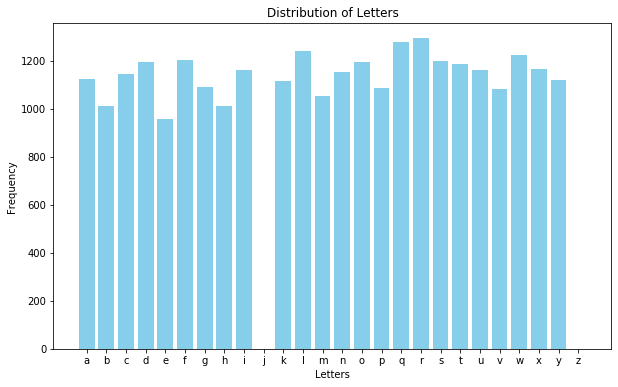

In [14]:
import string

train_labels_letters = map(lambda n: chr(n+97), train_label)

# Initialize a counter with all letters from 'a' to 'z' set to zero
letter_counts = Counter({letter: 0 for letter in string.ascii_lowercase})

# Update the counter with the actual letter counts from the text
letter_counts.update(train_labels_letters)

# Sort the letters for plotting
sorted_letters = sorted(letter_counts.items())

# Separate the letters and their frequencies for plotting
letters, frequencies = zip(*sorted_letters)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(letters, frequencies, color='skyblue')

# Add title and labels
plt.title('Distribution of Letters')
plt.xlabel('Letters')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
sorted(Counter(train_label).items())

[(0, 1126),
 (1, 1010),
 (2, 1144),
 (3, 1196),
 (4, 957),
 (5, 1204),
 (6, 1090),
 (7, 1013),
 (8, 1162),
 (10, 1114),
 (11, 1241),
 (12, 1055),
 (13, 1151),
 (14, 1196),
 (15, 1088),
 (16, 1279),
 (17, 1294),
 (18, 1199),
 (19, 1186),
 (20, 1161),
 (21, 1082),
 (22, 1225),
 (23, 1164),
 (24, 1118)]

In [17]:
train_letters[train_letters["label"]==0]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
46,0,197,195,196,195,197,196,195,196,196,...,84,65,182,213,211,212,212,213,213,213
50,0,142,144,144,146,147,149,150,151,153,...,178,179,179,180,181,182,182,182,183,183
58,0,198,200,201,200,199,198,198,197,198,...,100,99,99,98,99,98,100,100,101,100
59,0,231,232,234,237,238,241,243,244,248,...,90,66,199,255,255,255,255,255,255,255
89,0,147,149,150,152,153,153,152,153,154,...,174,165,166,165,166,169,167,133,135,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27365,0,156,159,161,162,163,165,167,168,168,...,62,42,13,0,0,0,0,0,0,0
27402,0,158,156,156,157,158,158,157,158,158,...,206,209,207,208,207,205,203,203,202,202
27409,0,165,167,169,172,174,177,179,180,181,...,94,160,224,231,232,233,233,232,232,232
27422,0,211,214,215,216,217,218,220,220,220,...,139,123,100,87,79,79,82,81,81,79


In [18]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

# Example DataFrame
data = {
    'A': [1, 2, 1, 3],
    'B': [4, 5, 4, 6],
    'C': [7, 8, 7, 9]
}
df = pd.DataFrame(data)

# Direct Comparison
def compare_rows(df):
    comparison_results = pd.DataFrame(index=df.index, columns=df.index)
    for i in df.index:
        for j in df.index:
            comparison_results.loc[i, j] = (df.loc[i] != df.loc[j]).sum()
    return comparison_results

comparison_results = compare_rows(df)
print("Direct Comparison (Number of different elements):")
print(comparison_results)

# Cosine Similarity
cos_sim = cosine_similarity(df)
cos_sim_df = pd.DataFrame(cos_sim, index=df.index, columns=df.index)
print("\nCosine Similarity:")
print(cos_sim_df)

# Euclidean Distance
euclidean_dist = pdist(df.values, metric='euclidean')
euclidean_dist_df = pd.DataFrame(squareform(euclidean_dist), index=df.index, columns=df.index)
print("\nEuclidean Distance:")
print(euclidean_dist_df)


Direct Comparison (Number of different elements):
   0  1  2  3
0  0  3  0  3
1  3  0  3  3
2  0  3  0  3
3  3  3  3  0

Cosine Similarity:
          0         1         2         3
0  1.000000  0.995591  1.000000  0.986928
1  0.995591  1.000000  0.995591  0.997693
2  1.000000  0.995591  1.000000  0.986928
3  0.986928  0.997693  0.986928  1.000000

Euclidean Distance:
          0         1         2         3
0  0.000000  1.732051  0.000000  3.464102
1  1.732051  0.000000  1.732051  1.732051
2  0.000000  1.732051  0.000000  3.464102
3  3.464102  1.732051  3.464102  0.000000


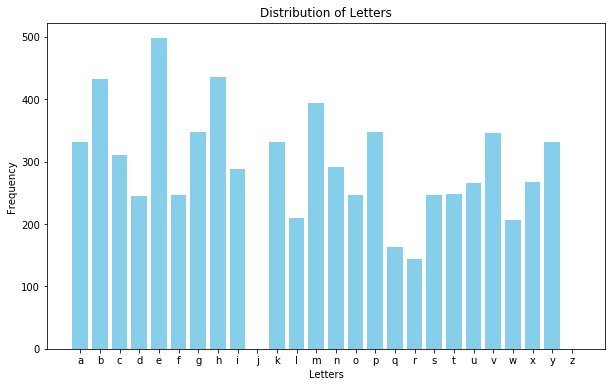

In [18]:
test_label = test_letters["label"]
test_data = test_letters.iloc[:, 1:]

import string

train_labels_letters = map(lambda n: chr(n+97), test_label)

# Initialize a counter with all letters from 'a' to 'z' set to zero
letter_counts = Counter({letter: 0 for letter in string.ascii_lowercase})

# Update the counter with the actual letter counts from the text
letter_counts.update(train_labels_letters)

# Sort the letters for plotting
sorted_letters = sorted(letter_counts.items())

# Separate the letters and their frequencies for plotting
letters, frequencies = zip(*sorted_letters)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(letters, frequencies, color='skyblue')

# Add title and labels
plt.title('Distribution of Letters')
plt.xlabel('Letters')
plt.ylabel('Frequency')

# Show the plot
plt.show()